In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris_data=pd.read_csv("E:\project\iris.csv")

In [6]:
iris_data.head()

,sepal length,sepal width,petal length,petal width,class
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [9]:
iris_data.isnull().sum()

sepal length    1
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [10]:
iris_data["sepal length"] = iris_data["sepal length"].fillna(iris_data["sepal length"].mean())


In [11]:
iris_data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [12]:
iris_data.shape

(150, 5)

In [13]:
x=iris_data.drop(columns="class")
y=iris_data["class"]

In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=200, random_state=42)

model.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



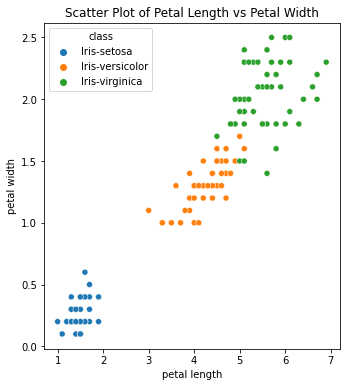

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=iris_data, x='petal length', y='petal width', hue='class')
plt.title('Scatter Plot of Petal Length vs Petal Width')

plt.show()

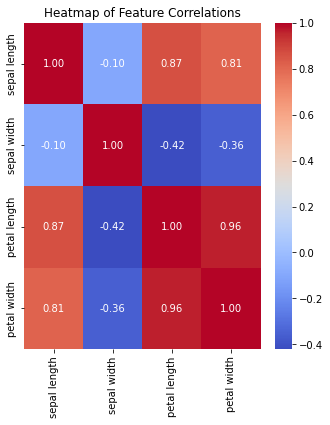

In [18]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
correlation_matrix = iris_data.drop('class', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

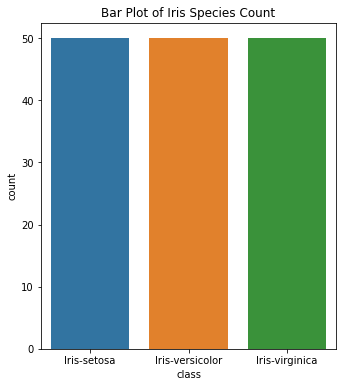

In [19]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
sns.countplot(data=iris_data, x='class')
plt.title('Bar Plot of Iris Species Count')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparing the data
x = iris_data.drop('class', axis=1)
y = iris_data['class']

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predicting the test set results
y_pred = model.predict(x_test)

# Evaluating the model
performance = classification_report(y_test, y_pred)

performance


'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'